In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wowojawir = cv2.imread('..\\img\\wowojawir.png')
if wowojawir is None:
    raise FileNotFoundError("Gambar '..\\img\\wowojawir.png' tidak ditemukan.")
wowojawir_Gray = cv2.cvtColor(wowojawir, cv2.COLOR_BGR2GRAY)

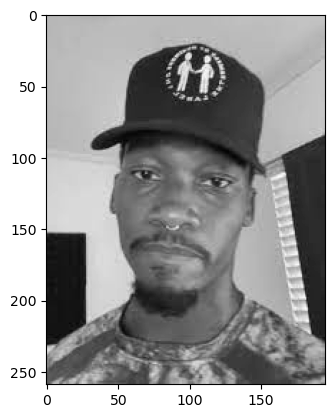

In [15]:
plt.imshow(wowojawir_Gray, cmap='gray')

In [16]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [17]:
# wowojawir_rgb = cv2.cvtColor(wowojawir_Gray, cv2.COLOR_GRAY2RGB)

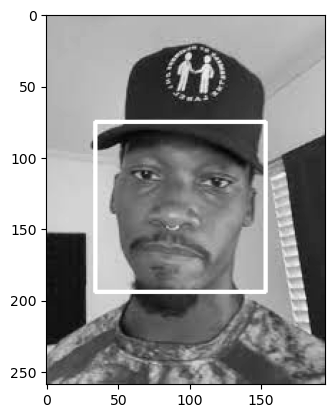

In [25]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    # face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=10)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255),2)
        
    return face_img

result = detect_face(wowojawir_Gray)
plt.imshow(result, cmap='gray')

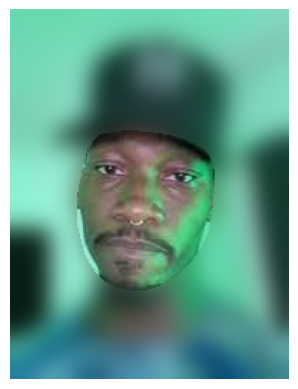

In [1]:

import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

img = cv2.imread('..\\img\\wowojawir.png')
if img is None:
    raise FileNotFoundError("Gambar '..\\img\\wowojawir.png' tidak ditemukan.")

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb_img)

mask = np.zeros(img.shape[:2], dtype=np.uint8)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        points = []
        for lm in face_landmarks.landmark:
            x = int(lm.x * img.shape[1])
            y = int(lm.y * img.shape[0])
            points.append([x, y])
        points = np.array(points, dtype=np.int32)
        hull = cv2.convexHull(points)
        cv2.fillConvexPoly(mask, hull, 255)

blurred = cv2.GaussianBlur(img, (51, 51), 0)
mask_3d = cv2.merge([mask, mask, mask])
result = np.where(mask_3d == 255, img, blurred)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [1]:
import cv2
import numpy as np
import os

# === arahkan ke folder cascade kamu ===
cascade_path ='../haar-cascade-files-master/haarcascade_frontalface_alt_tree.xml'

# pastikan path benar
if not os.path.exists(cascade_path):
    raise FileNotFoundError("Path ke haarcascade tidak ditemukan! Periksa lokasi file.")

face_cascade = cv2.CascadeClassifier(cascade_path)

# buka webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # ubah ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # deteksi wajah (atur parameter supaya lebih sensitif)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,   # sempitkan untuk wajah lebih kecil
        minNeighbors=3,    # ubah ke 3 kalau deteksi masih lemah
        minSize=(80, 80),  # ukuran minimum wajah yang dideteksi
    )

    print("Faces detected:", len(faces))

    # buat blur background
    blurred_frame = cv2.GaussianBlur(frame, (45, 45), 0)

    for (x, y, w, h) in faces:
        # ambil area wajah
        face_roi = frame[y:y+h, x:x+w]

        # sharpening kernel
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
        sharp_face = cv2.filter2D(face_roi, -1, kernel)

        # ganti area wajah di frame blur
        blurred_frame[y:y+h, x:x+w] = sharp_face

        # opsional: gambar kotak deteksi wajah
        cv2.rectangle(blurred_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("Zoom-like (Sharpen Face Only)", blurred_frame)

    # tekan q untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces detected: 0
Faces dete

In [2]:
import urllib.request

# ambil model DNN bawaan OpenCV (unduh jika belum ada)
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt"

# fungsi util untuk mengunduh jika file tidak ada
def download_if_missing(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename} ...")
        try:
            urllib.request.urlretrieve(url, filename)
            print(f"Downloaded {filename}")
        except Exception as e:
            raise RuntimeError(f"Failed to download {filename} from {url}: {e}")

# sumber file (raw) dari repositori OpenCV
proto_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"

# jika file tidak ada, unduh otomatis
download_if_missing(proto_url, configFile)
download_if_missing(model_url, modelFile)

# buat jaringan DNN (cv2 dan np sudah diimpor di sel sebelumnya)
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    # buat blur background
    blurred = cv2.GaussianBlur(frame, (45, 45), 0)

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # ambil yang akurat
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            # pastikan koordinat valid (menghindari indeks negatif atau out-of-bounds)
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w, x2), min(h, y2)
            if x2 <= x1 or y2 <= y1:
                continue
            face = frame[y1:y2, x1:x2]
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            sharp = cv2.filter2D(face, -1, kernel)
            blurred[y1:y2, x1:x2] = sharp

    cv2.imshow("Sharpen Face Only (DNN)", blurred)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [3]:
import urllib.request

# ambil model DNN bawaan OpenCV (unduh jika belum ada)
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt"

# fungsi util untuk mengunduh jika file tidak ada
def download_if_missing(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename} ...")
        try:
            urllib.request.urlretrieve(url, filename)
            print(f"Downloaded {filename}")
        except Exception as e:
            raise RuntimeError(f"Failed to download {filename} from {url}: {e}")

# sumber file (raw) dari repositori OpenCV
proto_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"

# jika file tidak ada, unduh otomatis
download_if_missing(proto_url, configFile)
download_if_missing(model_url, modelFile)


# buat jaringan DNN (cv2 dan np sudah diimpor di sel sebelumnya)
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

# === Load detektor mata Haar ===
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    result = frame.copy()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w, x2), min(h, y2)

            roi_gray = cv2.cvtColor(frame[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY)
            roi_color = result[y1:y2, x1:x2]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)

            for (ex, ey, ew, eh) in eyes:
                eye_roi = roi_color[ey:ey+eh, ex:ex+ew]
                blurred_eye = cv2.GaussianBlur(eye_roi, (35, 35), 30)
                roi_color[ey:ey+eh, ex:ex+ew] = blurred_eye

            cv2.rectangle(result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.imshow("Investigasi Mode (Blur Eyes - DNN)", result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [4]:
import cv2
import numpy as np
import os

# Paths to the cascades (relative to this notebook).
face_xml = '../haar-cascade-files-master/haarcascade_frontalface_default.xml'
smile_xml = '../haar-cascade-files-master/haarcascade_smile.xml'

# Verify files exist
if not os.path.exists(face_xml):
    raise FileNotFoundError(f'Face cascade not found: {face_xml}')
if not os.path.exists(smile_xml):
    raise FileNotFoundError(f'Smile cascade not found: {smile_xml}')

face_cascade = cv2.CascadeClassifier(face_xml)
smile_cascade = cv2.CascadeClassifier(smile_xml)

# Open default camera (0). Change index if you use another camera.
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError('Unable to open webcam (index 0).')

print('Starting webcam. Press q to quit.')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    h, w = frame.shape[:2]
    # create a blurred copy of the frame for background
    blurred = cv2.GaussianBlur(frame, (51, 51), 0)

    # convert to grayscale for detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces (tweak scaleFactor/minNeighbors if needed)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))

    # For each detected face, copy sharp face region back onto blurred image
    for (x, y, fw, fh) in faces:
        # ensure coordinates are within frame bounds
        x1, y1 = max(0, x), max(0, y)
        x2, y2 = min(w, x + fw), min(h, y + fh)
        if x2 <= x1 or y2 <= y1:
            continue

        face_roi_color = frame[y1:y2, x1:x2]
        # Restore sharp face into blurred background
        blurred[y1:y2, x1:x2] = face_roi_color

        # detect smile inside the face region (parameters chosen to reduce false positives)
        roi_gray = gray[y1:y2, x1:x2]
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=20, minSize=(25, 25))

        # detect mouth to help heuristics for 'sad/cry' (use mcs_mouth cascade if available)
        mouth_label = ''
        mouth_detected = False
        # try common mouth cascade filenames from the folder
        mouth_cascade_paths = [
            '../haar-cascade-files-master/haarcascade_mcs_mouth.xml',
            '../haar-cascade-files-master/haarcascade_mcs_mouth.xml',
            '../haar-cascade-files-master/haarcascade_mcs_mouth.xml'
        ]
        # load mouth cascade if exists (prefer provided mcs_mouth)
        mouth_cascade = None
        try:
            mouth_path = '../haar-cascade-files-master/haarcascade_mcs_mouth.xml'
            if os.path.exists(mouth_path):
                mouth_cascade = cv2.CascadeClassifier(mouth_path)
        except Exception:
            mouth_cascade = None

        mouths = []
        if mouth_cascade is not None and not mouth_cascade.empty():
            mouths = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=11, minSize=(20, 20))
            mouth_detected = len(mouths) > 0

        # annotate
        # decide label: smiling has priority; otherwise check mouth heuristics for sad/crying
        if len(smiles) > 0:
            label = 'Smiling'
            color = (0, 255, 0)  # green for smile
        else:
            # simple heuristic: open/lower mouth without smile could indicate sad/crying (very approximate)
            if mouth_detected:
                # find largest mouth and estimate relative position (lower half of face)
                mx, my, mw, mh = max(mouths, key=lambda r: r[2]*r[3])
                # if mouth is relatively wide or low in face region, label sad/crying
                rel_mouth_y = my + mh / 2
                rel_mouth_h = fh
                # check if mouth is near bottom half and somewhat open-wide
                if rel_mouth_y > rel_mouth_h * 0.45 or mw > fw * 0.5:
                    label = 'Sad/Crying'
                    color = (255, 0, 0)  # blue/red for sad
                else:
                    label = ''
                    color = (0, 165, 255)
            else:
                label = ''
                color = (0, 165, 255)  # orange for neutral

        cv2.rectangle(blurred, (x1, y1), (x2, y2), color, 2)
        if label:
            cv2.putText(blurred, label, (x1, max(20, y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # show result
    cv2.imshow('Smile detect - blurred background', blurred)

    # quit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Starting webcam. Press q to quit.


In [1]:
import cv2
import numpy as np
import os
import urllib.request

# Paths to the cascades (relative to this notebook).
face_xml = '../haar-cascade-files-master/haarcascade_frontalface_default.xml'
smile_xml = '../haar-cascade-files-master/haarcascade_smile.xml'

# Verify files exist
if not os.path.exists(face_xml):
    raise FileNotFoundError(f'Face cascade not found: {face_xml}')
if not os.path.exists(smile_xml):
    raise FileNotFoundError(f'Smile cascade not found: {smile_xml}')

face_cascade = cv2.CascadeClassifier(face_xml)
smile_cascade = cv2.CascadeClassifier(smile_xml)

# --- Age & Gender DNN models (optional) ---
age_proto = 'age_deploy.prototxt'
age_model = 'age_net.caffemodel'
gender_proto = 'gender_deploy.prototxt'
gender_model = 'gender_net.caffemodel'

# Candidate URLs to try (ordered) — added Dropbox mirrors from LearnOpenCV page
age_proto_candidates = [
    'https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/age_deploy.prototxt',
    'https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt'  # fallback (may be different shape)
]
age_model_candidates = [
    # LearnOpenCV Dropbox mirror (examples page recommends these)
    'https://www.dropbox.com/s/xfb20y596869vbb/age_net.caffemodel?dl=1',
    'https://github.com/spmallick/learnopencv/raw/master/AgeGender/age_net.caffemodel'
]
gender_proto_candidates = [
    'https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/gender_deploy.prototxt'
]
gender_model_candidates = [
    'https://www.dropbox.com/s/iyv483wz7ztr9gh/gender_net.caffemodel?dl=1',
    'https://github.com/spmallick/learnopencv/raw/master/AgeGender/gender_net.caffemodel'
]

def download_from_candidates(candidates, filename):
    """Try to download filename from a list of candidate URLs. Return True if exists after.
    Non-fatal: prints helpful messages on failure."""
    if os.path.exists(filename):
        print(f'{filename} already present locally')
        return True

    for url in candidates:
        try:
            print(f'Trying {url} ...')
            urllib.request.urlretrieve(url, filename)
            print(f'Downloaded {filename} from {url}')
            return True
        except Exception as e:
            print(f'Failed to download from {url}: {e}')
    # nothing worked
    print('\nAutomatic download failed for', filename)
    print('Manual download instructions:')
    print(' - Age model (caffemodel): https://www.dropbox.com/s/xfb20y596869vbb/age_net.caffemodel?dl=0')
    print(' - Gender model (caffemodel): https://www.dropbox.com/s/iyv483wz7ztr9gh/gender_net.caffemodel?dl=0')
    print(" - Proto files (text): search 'age_deploy.prototxt' and 'gender_deploy.prototxt' on GitHub or LearnOpenCV repo")
    print('Place the four files in the same folder as this notebook and re-run the cell.')
    return False

# attempt to download models (non-fatal)
print('Attempting to fetch age/gender model files (non-fatal).')
ok_age_proto = download_from_candidates(age_proto_candidates, age_proto)
ok_age_model = download_from_candidates(age_model_candidates, age_model)
ok_gender_proto = download_from_candidates(gender_proto_candidates, gender_proto)
ok_gender_model = download_from_candidates(gender_model_candidates, gender_model)

# load nets if files present
net_age = None
net_gender = None
model_status = 'Age/Gender: Missing'
try:
    if ok_age_proto and ok_age_model and os.path.exists(age_proto) and os.path.exists(age_model):
        net_age = cv2.dnn.readNetFromCaffe(age_proto, age_model)
        print('Loaded age net')
    if ok_gender_proto and ok_gender_model and os.path.exists(gender_proto) and os.path.exists(gender_model):
        net_gender = cv2.dnn.readNetFromCaffe(gender_proto, gender_model)
        print('Loaded gender net')
    if net_age is not None and net_gender is not None:
        model_status = 'Age/Gender: Loaded'
    elif net_age is not None or net_gender is not None:
        model_status = 'Age/Gender: Partially loaded'
except Exception as e:
    print('Failed to load age/gender nets:', e)
    model_status = 'Age/Gender: Load error'

# Create tracker
tracker = cv2.TrackerCSRT_create()
tracking = False
track_box = None

# Open default camera (0). Change index if you use another camera.
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError('Unable to open webcam (index 0).')

print('Starting webcam. Press q to quit, r to reset tracking.')

# For temporal smoothing of labels
label_history = []
history_size = 5  # how many frames to consider
label_threshold = 0.6  # proportion needed to show a label

# helper lists for age/gender nets
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']
MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    h, w = frame.shape[:2]
    # create a blurred copy of the frame for background
    blurred = cv2.GaussianBlur(frame, (51, 51), 0)

    # If we're tracking, update tracker
    track_success = False
    if tracking:
        track_success, bbox = tracker.update(frame)
        if track_success:
            x, y, fw, fh = [int(v) for v in bbox]
            # Ensure coordinates are within bounds
            x1, y1 = max(0, x), max(0, y)
            x2, y2 = min(w, x + fw), min(h, y + fh)
            if x2 > x1 and y2 > y1:  # valid box
                faces = [(x, y, fw, fh)]  # use tracked position
            else:
                track_success = False
        
    # If not tracking or tracking failed, run detection
    if not track_success:
        # convert to grayscale for detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))
        
        # If face found, initialize tracker
        if len(faces) > 0:
            x, y, fw, fh = faces[0]  # track the first face
            tracker = cv2.TrackerCSRT_create()
            track_success = tracker.init(frame, (x, y, fw, fh))
            tracking = track_success

    # For each detected face, copy sharp face region back onto blurred image
    for (x, y, fw, fh) in faces:
        # ensure coordinates are within frame bounds
        x1, y1 = max(0, x), max(0, y)
        x2, y2 = min(w, x + fw), min(h, y + fh)
        if x2 <= x1 or y2 <= y1:
            continue

        face_roi_color = frame[y1:y2, x1:x2]
        face_roi_gray = cv2.cvtColor(frame[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY)
        
        # Restore sharp face into blurred background
        blurred[y1:y2, x1:x2] = face_roi_color

        # detect smile inside the face region
        smiles = smile_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.7, minNeighbors=20, minSize=(25, 25))

        # detect mouth for sad/cry heuristic
        mouth_detected = False
        mx = my = mw = mh = 0
        try:
            mouth_path = '../haar-cascade-files-master/haarcascade_mcs_mouth.xml'
            if os.path.exists(mouth_path):
                mouth_cascade = cv2.CascadeClassifier(mouth_path)
                if not mouth_cascade.empty():
                    mouths = mouth_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.5, minNeighbors=11, minSize=(20, 20))
                    mouth_detected = len(mouths) > 0
                    if mouth_detected:
                        # find largest mouth
                        mx, my, mw, mh = max(mouths, key=lambda r: r[2]*r[3])
        except Exception:
            mouth_detected = False

        # Determine current frame's label
        current_label = ''
        if len(smiles) > 0:
            current_label = 'Smiling'
        elif mouth_detected:
            # check if mouth is in lower part and wide
            if my + mh/2 > fh * 0.45 or mw > fw * 0.5:
                current_label = 'Sad/Crying'

        # Update label history
        label_history.append(current_label)
        if len(label_history) > history_size:
            label_history.pop(0)

        # Count label occurrences
        label_counts = {}
        for lbl in label_history:
            if lbl:  # only count non-empty labels
                label_counts[lbl] = label_counts.get(lbl, 0) + 1

        # Determine final label based on history
        final_label = ''
        color = (0, 165, 255)  # default orange for neutral
        if label_counts:
            most_common = max(label_counts.items(), key=lambda x: x[1])
            if most_common[1] / len(label_history) >= label_threshold:
                final_label = most_common[0]
                if final_label == 'Smiling':
                    color = (0, 255, 0)  # green
                elif final_label == 'Sad/Crying':
                    color = (255, 0, 0)  # red/blue

        # --- Age & Gender prediction (optional DNN models) ---
        age_gender_label = ''
        try:
            if net_age is not None and net_gender is not None:
                # pad the face slightly (improves predictions sometimes)
                pad = int(0.15 * min(fw, fh))
                sx = max(0, x1 - pad)
                sy = max(0, y1 - pad)
                ex = min(w, x2 + pad)
                ey = min(h, y2 + pad)
                face_for_dnn = cv2.resize(frame[sy:ey, sx:ex], (227, 227))
                blob = cv2.dnn.blobFromImage(face_for_dnn, 1.0, (227, 227), MEAN_VALUES, swapRB=False)

                # predict gender
                net_gender.setInput(blob)
                gender_preds = net_gender.forward()
                gender = GENDER_LIST[int(np.argmax(gender_preds))]

                # predict age
                net_age.setInput(blob)
                age_preds = net_age.forward()
                age = AGE_LIST[int(np.argmax(age_preds))]

                age_gender_label = f"{gender}, {age}"
        except Exception as e:
            # keep silent in UI but print once to console for debugging
            # (avoid spamming per-frame)
            print('Age/Gender predict error:', e)
            age_gender_label = ''

        # Draw rectangle with tracking status indicator
        thickness = 3 if tracking and track_success else 2
        cv2.rectangle(blurred, (x1, y1), (x2, y2), color, thickness)
        
        # Add tracking indicator
        status = "Tracking" if tracking and track_success else "Detecting"
        cv2.putText(blurred, status, (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

        # Draw emotion label if stable
        label_y = max(20, y1 - 10)
        if final_label:
            cv2.putText(blurred, final_label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            label_y -= 22

        # Draw age/gender label if available
        if age_gender_label:
            cv2.putText(blurred, age_gender_label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (200, 200, 0), 2)

    # show model load status (top-left)
    cv2.putText(blurred, model_status, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (50, 200, 50) if 'Loaded' in model_status else (0, 200, 200), 2)

    # show result
    cv2.imshow('Face tracking with emotion (press r to reset)', blurred)

    # handle keys
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('r'):  # reset tracking
        tracking = False
        label_history.clear()

cap.release()
cv2.destroyAllWindows()

Attempting to fetch age/gender model files (non-fatal).
age_deploy.prototxt already present locally
age_net.caffemodel already present locally
gender_deploy.prototxt already present locally
gender_net.caffemodel already present locally
Loaded age net
Loaded gender net
Starting webcam. Press q to quit, r to reset tracking.
